In [3]:
!pip install yfinance

In [4]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import yfinance as yf

In [11]:
# import Infosys data\n",

stock_data = yf.download('INFY', period='max')

  

[*********************100%%**********************]  1 of 1 completed


In [12]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6.304000e+03
mean,7.785370,7.869899,7.700675,7.786829,6.528600,1.130691e+07
std,5.300879,5.332308,5.271400,5.303105,5.380708,9.151337e+06
min,0.583984,0.626953,0.583984,0.625000,0.412873,3.360000e+05
25%,4.399688,4.453906,4.325938,4.387344,3.005274,5.871275e+06
50%,6.748125,6.815000,6.689375,6.758125,5.059972,9.213650e+06
75%,9.066250,9.150000,8.955019,9.060625,7.491175,1.405758e+07
max,26.150000,26.389999,25.580000,26.200001,24.964010,1.725120e+08


In [24]:
#input and output feature preparation

#input features
stock_data.shape

X = stock_data[['Open', 'High', 'Low','Close','Adj Close', 'Volume']] #x will be holding all input values
y = stock_data['Close'] #y will hold the output part


In [23]:
print (X[:100])
#here we can see the infosys data that will work as the input features, helping in our predictions.

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
1999-03-11  0.583984  0.781250  0.583984  0.732422   0.483835  172512000
1999-03-12  0.734375  0.761719  0.671875  0.728516   0.481255   39897600
1999-03-15  0.730469  0.730469  0.658203  0.662109   0.437387   12672000
1999-03-16  0.667969  0.691406  0.656250  0.656250   0.433516    9984000
1999-03-17  0.656250  0.699219  0.652344  0.660156   0.436097   15449600
...              ...       ...       ...       ...        ...        ...
1999-07-27  1.175781  1.290039  1.171875  1.244141   0.822172    5100800
1999-07-28  1.253906  1.367188  1.253906  1.339844   0.885416    3948800
1999-07-29  1.308594  1.310547  1.265625  1.292969   0.854439    2630400
1999-07-30  1.289063  1.300781  1.277344  1.277344   0.844114    2246400
1999-08-02  1.282227  1.343750  1.282227  1.298828   0.858311    1638400

[100 rows x 6 columns]


In [26]:
#now splitting the dataset into training and testing sets
#importing train_test_split function
from sklearn.model_selection import train_test_split
#splitting the data set
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.20) 

#x_train will be input training set
#y_train will be output holding training set
#likewise for testing part

In [29]:
print (X_train.shape , X_test.shape, y_train.shape, y_test.shape)

(5043, 6) (1261, 6) (5043,) (1261,)


In [31]:
#Creating RandomForestModel and importing RFMregressor
from sklearn.ensemble import RandomForestRegressor

In [32]:
#Instatiation of the model
model = RandomForestRegressor (n_estimators = 30, random_state = 30)

In [34]:
#Fitting the model
LL_rf = model.fit(X_train, y_train)

In [35]:
# Training Model Evaluation

In [38]:
from sklearn.metrics import mean_absolute_error , mean_squared_error, explained_variance_score , r2_score

In [37]:
#The training r_sq
print('The training r_sq is: %.2f'% LL_rf.score(X_train , y_train))

The training r_sq is: 1.00


In [44]:
# Prediction on the training dataset

ytrain_pred = LL_rf.predict(X_train)
print (ytrain_pred)

[ 7.5499585   5.38466689  4.72416658 ...  4.73270834 22.88966605
  5.11141664]


In [43]:
#The MAE on the training dataset
print('The MAE is: %.2f' %mean_absolute_error(y_train, ytrain_pred))

The MAE is: 0.00


In [45]:
#The MSE on the training dataset
print('The MSE is: %.2f' %mean_squared_error(y_train, ytrain_pred))


The MSE is: 0.00


In [48]:
#The RMSE on the training dataset
import numpy as np
print ('The RMSE is: %.2f' % np.sqrt(mean_squared_error(y_train, ytrain_pred)))

The RMSE is: 0.00


In [50]:
#The EVS on the training dataset
print('The EVS is: %.2f' %explained_variance_score(y_train, ytrain_pred))

The EVS is: 1.00


In [51]:
#Prediction on the testing data
y_test_pred = LL_rf.predict(X_test)

In [52]:
print(y_test_pred[:10])

[ 1.65388554  4.36525006  8.66460355  5.49226564 17.37133395  7.42591669
 18.43666706 18.46133277  7.34008334 18.51533343]


In [54]:
#The testing coefficeint of detertimination
print('The testing r_sq is : %.2f'% r2_score(y_test, y_test_pred))

The testing r_sq is : 1.00


In [55]:
#Or for testingset
print('The testing r_sq is : %.2f'% LL_rf.score(X_test, y_test))

The testing r_sq is : 1.00


In [56]:
#The metrics for testingset

#The MAE for testingset

print('The MAE is: %.2f' %mean_absolute_error(y_test, y_test_pred))

The MAE is: 0.00


In [57]:
#The MSE for testingset

print('The MSE is: %.2f' %mean_squared_error(y_test, y_test_pred))

The MSE is: 0.00


In [62]:
#The RMSE
print ('The RMSE is:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

The RMSE is: 0.01929453420863689


In [63]:
#The EVS for testingset
print('The EVS is: %.2f' %explained_variance_score(y_test, y_test_pred))

The EVS is: 1.00


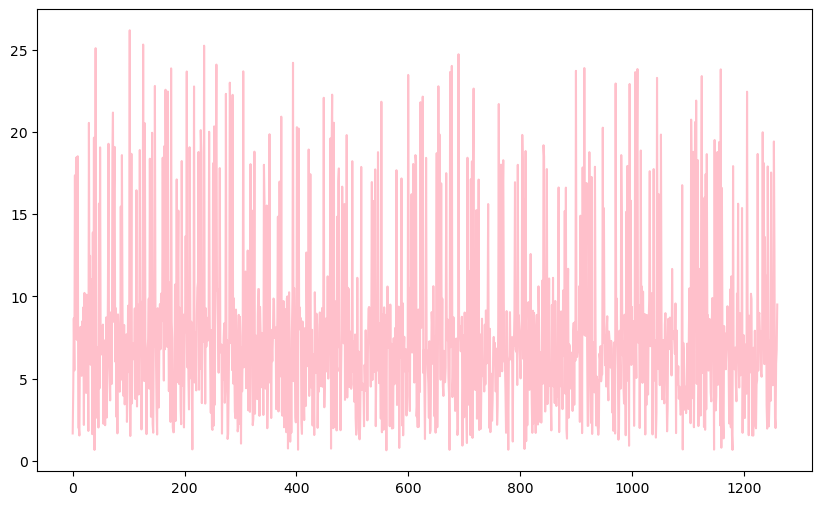

In [69]:
#PLOTTING observed vs predicted data using matplot

import matplotlib.pyplot as plt
#Setting the boundaries and parameters
plt.rcParams['figure.figsize'] = (10,6)
x_ax = range(len(X_test))

#Plotting
plt.plot(x_ax, y_test, label = 'Observed', color ='pink', linestyle ='-')
